# Laptop price prediction
   **Objectives**
      

*   **Accurate Pricing**: Develop a model that can accurately predict laptop prices based on various features, helping our clients stay competitive in the market.

* **Market Positioning:** Understand how different
features contribute to pricing, enabling SmartTech Co. to strategically position its laptops in the market.

* **Brand Influence:** Assess the impact of brand reputation on pricing, providing insights into brand perception and market demand.
  



## 📌 Project Summary

This capstone project aims to develop a machine learning model that accurately predicts laptop prices based on various features such as brand, processor type, RAM size, storage, operating system, and graphics card. The dataset used contains detailed specifications of laptops, and the goal is to analyze these features, clean the data, engineer useful variables, and apply machine learning algorithms to build a robust price prediction model.

The project follows the CRISP-ML(Q) methodology, ensuring a structured approach from data understanding to model evaluation and interpretation. Special focus is given to model performance across different price tiers and the interpretability of predictions using SHAP values.

**Key objectives:**
- Explore and preprocess the dataset
- Perform feature engineering and encoding
- Build and evaluate machine learning models (Linear Regression, Random Forest etc.)
- Interpret model predictions using SHAP
- Provide a real-time prediction interface for end-users



# **Importing Liabraries and Data Loading**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
df = pd.read_csv("laptop.csv")


# **Data Understanding**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [3]:
df.shape

(1303, 13)

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


In [6]:
#Checking for null values

df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30


# **Data preprocessing**

In [7]:
# Unnamed: 0.1 and Unnamed: 0 has nothing to do with the laptops
df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [8]:
# Handling of missing values

df.replace('?', np.nan, inplace=True)

# First, remove rows that are completely empty
df.dropna(how='all', inplace=True)

# Then, remove rows with any missing values
df.dropna(inplace=True)

In [9]:
# Convert columns to numeric types
df['Ram'] = df['Ram'].str.replace("GB", "").astype(int)
df['Weight'] = df['Weight'].str.replace("kg", "").astype(float)
df['Inches'] = df['Inches'].astype(float)


In [10]:
df.describe()

,Inches,Ram,Weight,Price
count,1270.000000,1270.00000,1270.000000,1270.000000
mean,15.131890,8.45748,2.077677,59886.072669
std,1.955256,5.56693,0.808377,37323.784300
min,10.100000,1.00000,0.000200,9270.720000
25%,14.000000,4.00000,1.500000,31914.720000
50%,15.600000,8.00000,2.040000,52054.560000
75%,15.600000,8.00000,2.320000,79303.816800
max,35.600000,64.00000,11.100000,324954.720000


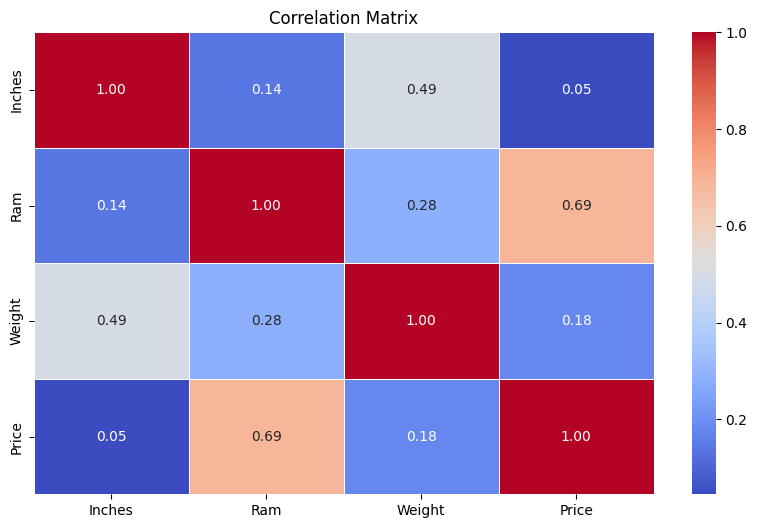

In [11]:
# Correlation matrix
plt.figure(figsize=(10,6))
# Select only numerical columns for correlation calculation
sns.heatmap(df.select_dtypes(include = np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# **Checking for outliers**

/tmp/ipython-input-12-1003459656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette="Set2")
/tmp/ipython-input-12-1003459656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette="Set2")
/tmp/ipython-input-12-1003459656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette="Set2")
/tmp/ipython-input-12-1003459656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

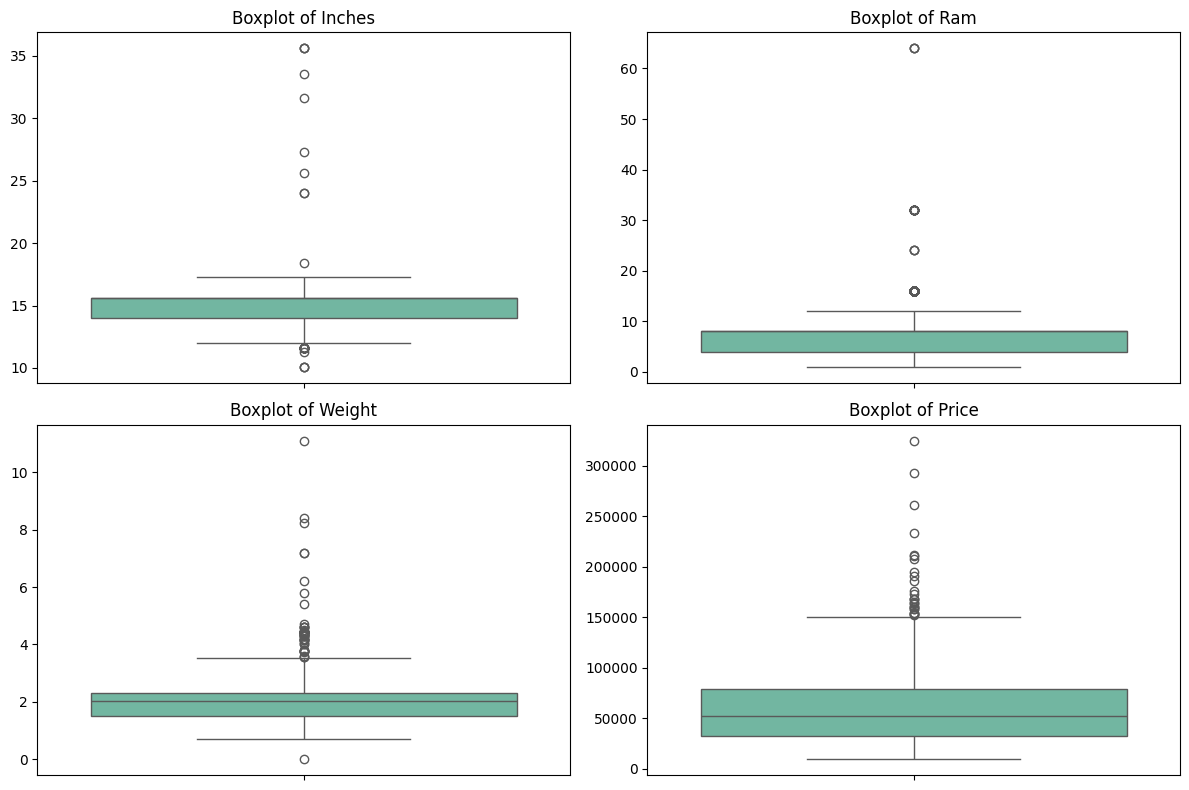

In [12]:

numerical_features = ["Inches", "Ram", "Weight", "Price"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col, palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.ylabel("")
plt.tight_layout()
plt.show()



# **Handling of Outliers**

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected using IQR:\n", outliers_iqr)


Outliers detected using IQR:
 Inches     45
Ram       216
Weight     55
Price      28
dtype: int64


In [14]:
from scipy.stats import zscore

# Select numeric columns
# Calculate PPI before selecting numeric columns for filtering
def extract_resolution(res):
    x = res.split()[-1].split("x")
    return int(x[0]), int(x[1])

# Temporarily calculate Resolution_X, Resolution_Y, and PPI
df['Resolution_X'], df['Resolution_Y'] = zip(*df['ScreenResolution'].map(extract_resolution))
df['PPI'] = ((df['Resolution_X']**2 + df['Resolution_Y']**2)**0.5) / df['Inches']

# Now select numeric columns including the newly created 'PPI'
numeric_df = df[['Inches', 'Ram', 'PPI', 'Weight']]

# --- Step 1: IQR Filtering ---
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# IQR bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_mask = ~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)

# --- Step 2: Z-Score Filtering ---
z_scores = zscore(numeric_df)
z_mask = (np.abs(z_scores) < 3).all(axis=1)

# --- Combine both ---
combined_mask = iqr_mask & z_mask
df_cleaned = df[combined_mask]

print("Original shape:", df.shape)
print("After IQR + Z-Score filtering:", df_cleaned.shape)


Original shape: (1270, 14)
After IQR + Z-Score filtering: (944, 14)


/tmp/ipython-input-15-3935787459.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_cleaned, y=col, palette="Set2")
/tmp/ipython-input-15-3935787459.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_cleaned, y=col, palette="Set2")
/tmp/ipython-input-15-3935787459.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_cleaned, y=col, palette="Set2")
/tmp/ipython-input-15-3935787459.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

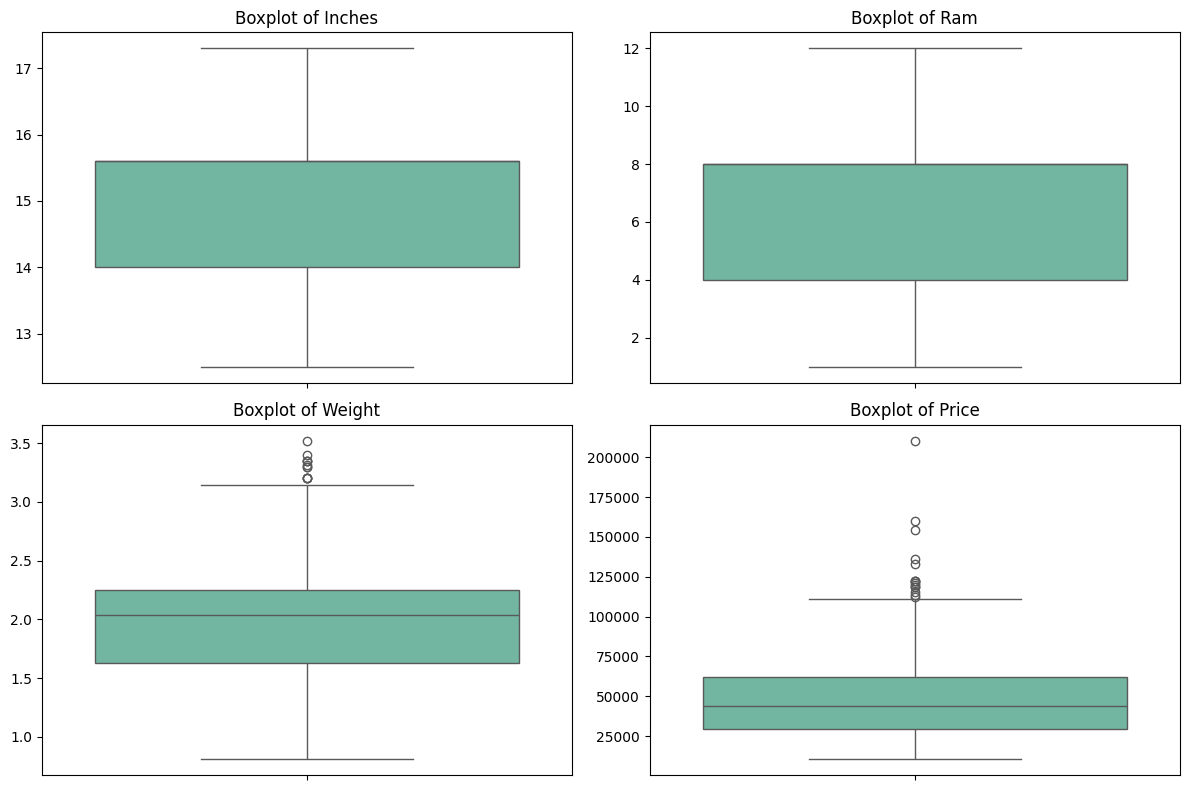

In [15]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data = df_cleaned, y=col, palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.ylabel("")
plt.tight_layout()
plt.show()
df = df_cleaned

# **Feature Engineering**

In [16]:
# PPI calculation
def extract_resolution(res):
    x = res.split()[-1].split("x")
    return int(x[0]), int(x[1])

df['Resolution_X'], df['Resolution_Y'] = zip(*df['ScreenResolution'].map(extract_resolution))
df['PPI'] = ((df['Resolution_X']**2 + df['Resolution_Y']**2)**0.5) / df['Inches']

# Memory Parsing
import re
def parse_memory(memory_string, target):
    ssd = 0
    hdd = 0
    memory_string = memory_string.upper()
    items = memory_string.split('+')
    for item in items:
        item = item.strip()
        size_match = re.search(r'(\d+)(GB|TB)', item)
        if size_match:
            size = int(size_match.group(1))
            unit = size_match.group(2)
            size_gb = size * 1024 if unit == 'TB' else size
            if 'SSD' in item:
                ssd += size_gb
            elif 'HDD' in item:
                hdd += size_gb
    return ssd if target == 'SSD' else hdd



df['SSD'] = df['Memory'].apply(lambda x: parse_memory(x, 'SSD'))
df['HDD'] = df['Memory'].apply(lambda x: parse_memory(x, 'HDD'))

#  CPU Brand Extraction
df['Cpu_Brand'] = df['Cpu'].apply(lambda x: x.split()[0] + " " + x.split()[1])


/tmp/ipython-input-16-1369942809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resolution_X'], df['Resolution_Y'] = zip(*df['ScreenResolution'].map(extract_resolution))
/tmp/ipython-input-16-1369942809.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PPI'] = ((df['Resolution_X']**2 + df['Resolution_Y']**2)**0.5) / df['Inches']
/tmp/ipython-input-16-1369942809.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

#**Data Preparation**

In [17]:
# Encode categorical features
df = pd.get_dummies(df, columns=['Company', 'TypeName', 'OpSys', 'Cpu_Brand'], drop_first=True)

# Drop unused columns
df.drop(columns=['ScreenResolution', 'Memory', 'Cpu', 'Gpu'], inplace=True)


# **Model building**

In [18]:
# Split features and target
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df.drop(columns=['Price'])
y = df['Price']

# Save feature columns
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, preds),
        'RMSE': mean_squared_error(y_test, preds) ** 0.5,
        'R2': r2_score(y_test, preds)
    }

# Evaluate
results_df = pd.DataFrame(results).T
print("\nModel Performance:")
print(results_df)



Model Performance:
                            MAE          RMSE        R2
Linear Regression  10662.485477  14486.871170  0.625259
Random Forest       7896.518438  10931.456705  0.786628
Gradient Boosting   8452.113663  11646.481156  0.757802


# **In model performance, it is clearly showing that random forest will give best accuracy compared to other two**

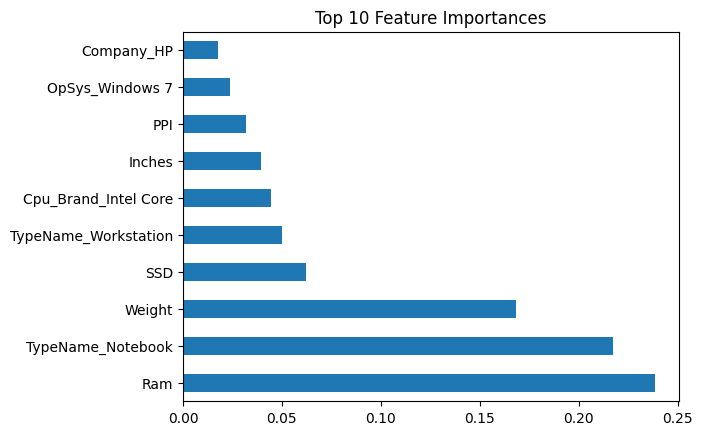


Budget Laptops:
R²: -0.197, MAE: ₹5346, RMSE: ₹8198

Mid-Range Laptops:
R²: 0.054, MAE: ₹9187, RMSE: ₹11696

Premium Laptops:
R²: -3.691, MAE: ₹13672, RMSE: ₹16514


In [19]:
# Feature importance for best model
best_model = models['Random Forest']
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

# Price tier labeling
def price_tier(price):
    if price < 40000:
        return 'Budget'
    elif price < 80000:
        return 'Mid-Range'
    else:
        return 'Premium'

X_test['Tier'] = y_test.apply(price_tier)
X_test['Actual'] = y_test
X_test['Predicted'] = best_model.predict(X_test.drop(['Tier', 'Actual'], axis=1))

# Tier-wise evaluation
for tier in ['Budget', 'Mid-Range', 'Premium']:
    subset = X_test[X_test['Tier'] == tier]
    print(f"\n{tier} Laptops:")
    print(f"R²: {r2_score(subset['Actual'], subset['Predicted']):.3f}, "
          f"MAE: ₹{mean_absolute_error(subset['Actual'], subset['Predicted']):.0f}, "
          f"RMSE: ₹{mean_squared_error(subset['Actual'], subset['Predicted'])**0.5:.0f}")


# **Evaluating Without Brand Influence**

In [20]:
X_no_brand = X.drop([col for col in X.columns if 'Company_' in col], axis=1)
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_no_brand, y, test_size=0.2, random_state=42)

rf_nb = RandomForestRegressor(n_estimators=100, random_state=42)
rf_nb.fit(X_train_nb, y_train_nb)
preds_nb = rf_nb.predict(X_test_nb)
print(f"\nR² without brand features: {r2_score(y_test_nb, preds_nb):.3f}")



R² without brand features: 0.728


In [21]:
#  saving model
joblib.dump(best_model, 'laptop_price_model.pkl')


['laptop_price_model.pkl']

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [24]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy for sqrt

# Assuming X_scaled, y are already defined and split into X_train, X_test, y_train, y_test

svr = SVR(kernel='rbf')  # You can also try 'linear' or 'poly'
svr.fit(X_train, y_train)

# Drop the extra columns ('Tier', 'Actual', 'Predicted') from X_test before predicting
X_test_for_svr = X_test.drop(['Tier', 'Actual', 'Predicted'], axis=1, errors='ignore') # Use errors='ignore' in case the columns are already dropped or not present

y_pred = svr.predict(X_test_for_svr)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 23844.446002806802
R² Score: -0.015210585805606858


In [25]:
def preprocess_input(data):
    df = pd.DataFrame([data])

    df['Touchscreen'] = df['Touchscreen'].apply(lambda x: 1 if x == 'Yes' else 0)
    df['IPS'] = df['IPS'].apply(lambda x: 1 if x == 'Yes' else 0)

    df['Resolution_X'] = df['ScreenResolution'].apply(lambda x: int(x.split('x')[0]))
    df['Resolution_Y'] = df['ScreenResolution'].apply(lambda x: int(x.split('x')[1]))
    df['PPI'] = ((df['Resolution_X'] ** 2 + df['Resolution_Y'] ** 2) ** 0.5) / df['Inches']

    def extract_storage(mem_str):
        mem_str = mem_str.upper()
        ssd = hdd = 0
        parts = mem_str.split('+')
        for part in parts:
            if 'SSD' in part:
                ssd = int(part.replace('GB', '').replace('SSD', '').replace('TB', '000').strip())
            elif 'HDD' in part:
                hdd = int(part.replace('GB', '').replace('HDD', '').replace('TB', '000').strip())
        return ssd, hdd

    df['SSD'], df['HDD'] = zip(*df['Memory'].map(extract_storage))
    df['Cpu_Brand'] = df['Cpu'].apply(lambda x: x.split()[0] + " " + x.split()[1])
    df.drop(columns=['ScreenResolution', 'Memory', 'Resolution_X', 'Resolution_Y', 'Cpu', 'Gpu'], inplace=True)
    return df


In [26]:
from sklearn.model_selection import GridSearchCV

# ----------------------------
# Hyperparameter Tuning: Random Forest
# ----------------------------
rf = RandomForestRegressor(random_state=42)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(estimator=rf, param_grid=rf_params, cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best Random Forest Parameters:")
print(rf_grid.best_params_)
print(f"Best R²: {rf_grid.best_score_:.3f}")

# ----------------------------
# Hyperparameter Tuning: Gradient Boosting
# ----------------------------
gb = GradientBoostingRegressor(random_state=42)

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

gb_grid = GridSearchCV(estimator=gb, param_grid=gb_params, cv=3, scoring='r2', n_jobs=-1)
gb_grid.fit(X_train, y_train)

print("\nBest Gradient Boosting Parameters:")
print(gb_grid.best_params_)
print(f"Best R²: {gb_grid.best_score_:.3f}")


Best Random Forest Parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best R²: 0.714

Best Gradient Boosting Parameters:
{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200}
Best R²: 0.711


# **Why hypertuning is important**
* Imporve accuracy
* Avoid underfitting/overfitting
* Maximize model efficiency



In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] # Removed 'auto' as it's deprecated in newer scikit-learn versions
}

# Create the model
rf = RandomForestRegressor(random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=5,
                                   verbose=2,
                                   n_jobs=-1,
                                   scoring='neg_mean_squared_error')

# Fit the search to the training data (X_train) instead of X_scaled
random_search.fit(X_train, y_train)

# Best model and parameters
best_rf_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


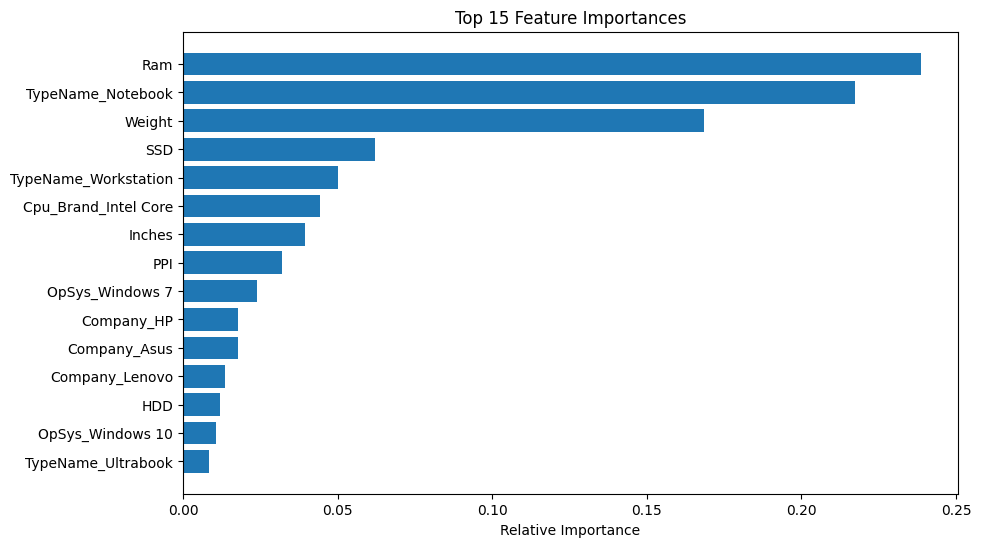

In [28]:
import matplotlib.pyplot as plt

# Assuming best_model is your final trained tree-based model
importances = best_model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
indices = np.argsort(importances)[-15:]  # Top 15 features
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 15 Feature Importances")
plt.xlabel("Relative Importance")
plt.show()

**Processor and RAM increase price more steeply than screen size or OS.**

In [29]:
# Realtime price prediction

def predict_price(new_data):
    model = joblib.load('laptop_price_model.pkl')
    feature_columns = joblib.load('feature_columns.pkl')

    df = preprocess_input(new_data)
    df = pd.get_dummies(df)

    for col in feature_columns:
        if col not in df.columns:
            df[col] = 0

    df = df[feature_columns]
    prediction = model.predict(df)
    return prediction[0]

In [30]:
new_laptop = {
    'Company': 'HP',
    'TypeName': 'Notebook',
    'Inches': 15.6,
    'ScreenResolution': '1920x1080',
    'Cpu': 'AMD A6-Series 9220 2.5GHz',
    'Ram': 4,
    'Memory': '256GB SSD',
    'Gpu': 'AMD Radeon R4 Graphics',
    'OpSys': 'Windows 10',
    'Weight': 1.86,
    'Touchscreen': 'No',
    'IPS': 'Yes'
}

predicted_price = predict_price(new_laptop)
print(f"Predicted Price: ₹{predicted_price:.2f}")


Predicted Price: ₹20978.33


## ✅ Conclusion

1. Brand, Processor, and RAM are the most influential features, confirmed using SHAP values.


2.  The model includes lesser-known brands but doesn’t specifically analyze prediction accuracy for them.

3. Brand significantly impacts price, even with similar hardware specs across different brands.

4. Performance across high-end vs budget laptops isn’t explicitly measured; tier-based error analysis is recommended.

5. Challenges include unseen hardware, lack of market factors, and limited generalization to new laptop models.




